## Decision Tree of Penguins Dataset :

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [2]:
#data loading
df=pd.read_csv("D:\\penguins.csv")
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Data claening

In [3]:
# check null values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
#Drop null values
df.dropna(inplace=True)

In [5]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

### Exploratory data analysis(EDA) 

In [6]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
#statistical summary
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Figure size 1800x600 with 0 Axes>

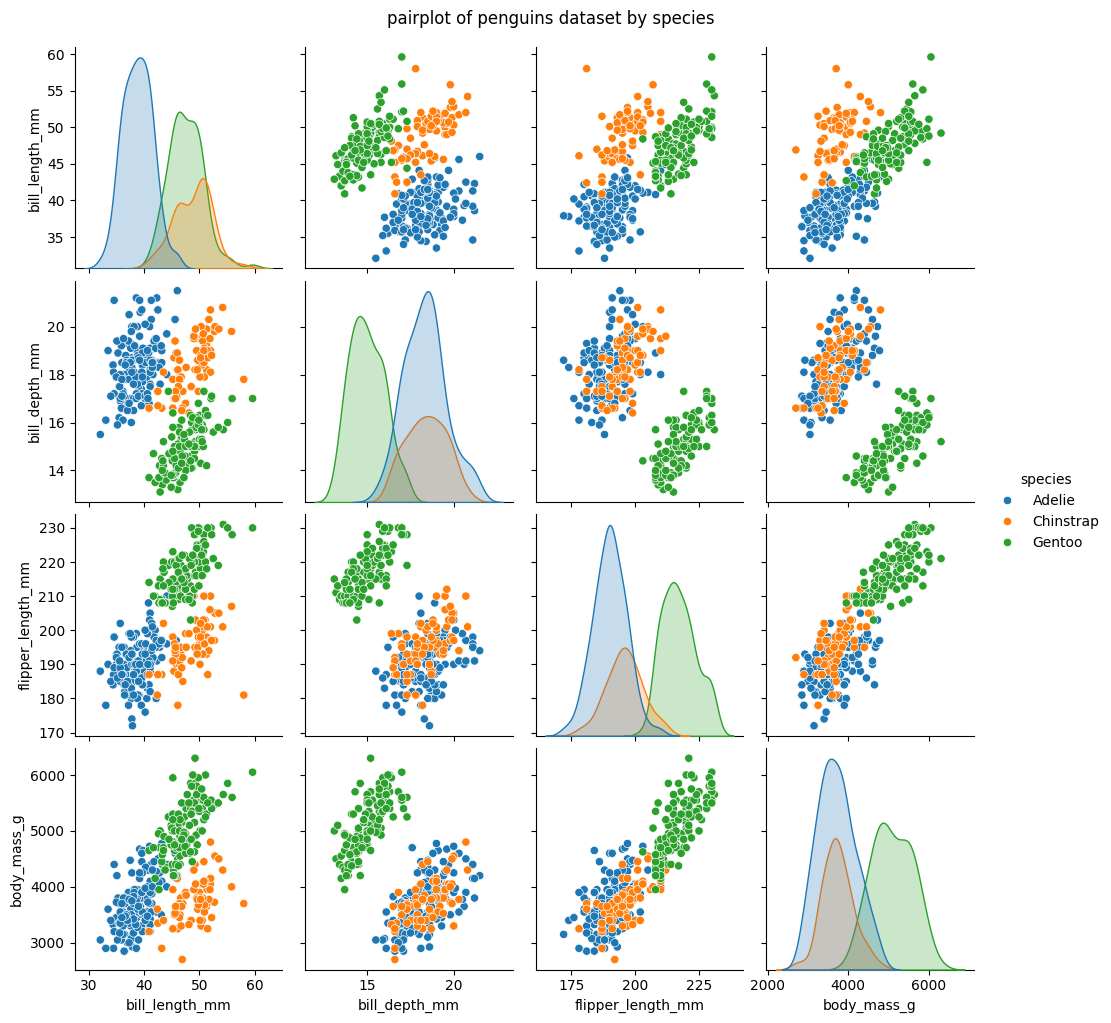

In [8]:
#pairplot for feature relationship
plt.figure(figsize=(18,6))
sns.pairplot(df,hue='species')
plt.suptitle("pairplot of penguins dataset by species",size=12,y=1.02)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17256\1643703381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='species',palette='coolwarm')


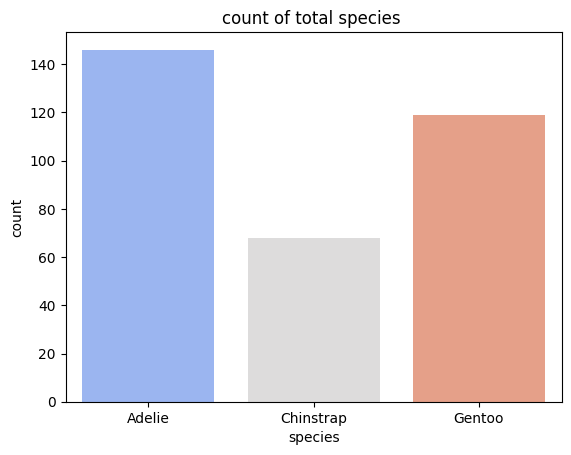

In [9]:
#count plot of species 
sns.countplot(data=df,x='species',palette='coolwarm')
plt.title("count of total species ")
plt.show()

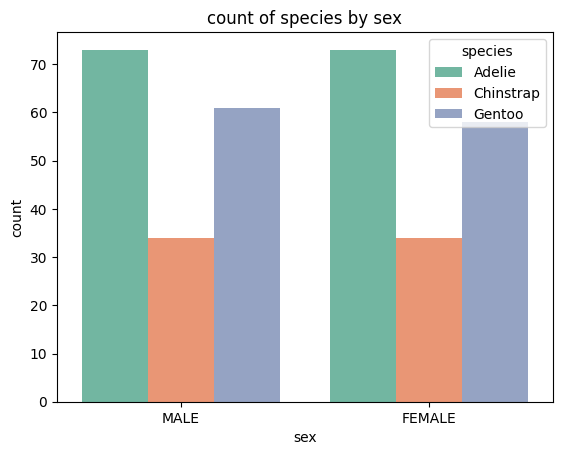

In [10]:
#count plot by species
sns.countplot(data=df,x='sex',hue='species',palette='Set2')
plt.title("count of species by sex")
plt.show()

### Feature Encoding

In [11]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [12]:
#Encode categorical features
le_species=LabelEncoder()
le_island=LabelEncoder()
le_sex=LabelEncoder()

df["species"]=le_species.fit_transform(df.species)
df["island"]=le_island.fit_transform(df.island)
df["sex"]=le_sex.fit_transform(df.sex)

In [13]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [14]:
#define dependent and independent features
x=df.drop('species',axis=1)
y=df.species

### Train test split data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Model Building and Hyparameter Tuning

In [16]:
#GridsearchaCV for hyparameter tuning
model=DecisionTreeClassifier()
params={'criterion':['gini','entropy'],'max_depth':[3,4,5],'min_samples_split':[3,5],'splitter':['best','random']}
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'min_samples_split': [3, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
#see the best parameters
print("Best parameters:",gcv.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'splitter': 'random'}


In [18]:
# Best model 
best_model=gcv.best_estimator_
y_predict=best_model.predict(x_test)

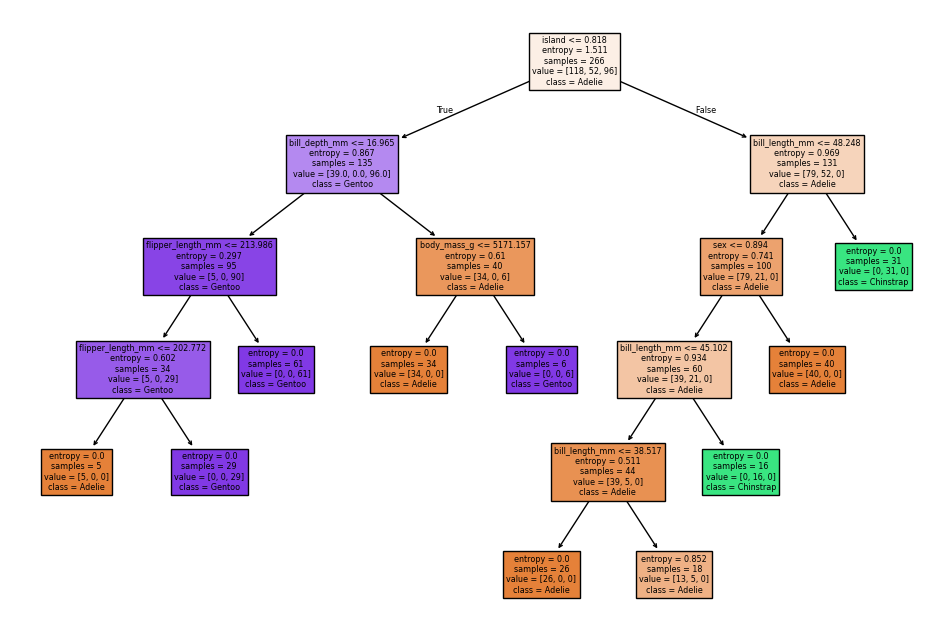

In [19]:
#plot decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(best_model,filled=True,feature_names=x.columns,class_names=['Adelie','Chinstrap','Gentoo'])
plt.show()

### Model Evaluation


In [20]:
#accuracy score
accuracy=accuracy_score(y_test,y_predict)
print(f"Accuracy score of model:{accuracy*100:.2f}%")

Accuracy score of model:98.51%


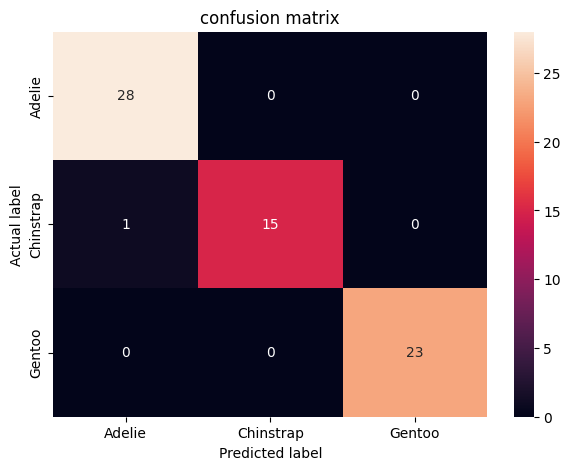

In [21]:
#plot confusion matrix
con=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(7,5))
labels=['Adelie','Chinstrap','Gentoo']
sns.heatmap(con,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel("Actual label")
plt.title("confusion matrix")
plt.show()

In [22]:
#see classification report
print("\nClassification report:\n",classification_report(y_test,y_predict))


Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



### Save the model

In [23]:
#Save in joblib file
joblib.dump(best_model,'decision_model.joblib')

['decision_model.joblib']